In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.pipeline import Pipeline, FeatureUnion
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from plotly import tools
#import plotly.plotly as py

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , roc_auc_score , precision_recall_curve , roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [112]:
data = pd.read_csv("bank.csv" , sep = ";")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [6]:
column_list = data.columns.values.tolist()

for col in column_list:
    print('\033[1m  {}  \033[0m'.format(col))
    print(data[col].unique())
    print("Number of total unique value for {} feature is {}:".format(col , len(data[col].unique()) ))
    print('\n')

  age  
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
Number of total unique value for age feature is 67:


  job  
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
Number of total unique value for job feature is 12:


  marital  
['married' 'single' 'divorced']
Number of total unique value for marital feature is 3:


  education  
['primary' 'secondary' 'tertiary' 'unknown']
Number of total unique value for education feature is 4:


  default  
['no' 'yes']
Number of total unique value for default feature is 2:


  balance  
[ 1787  4789  1350 ...  -333 -3313  1137]
Number of total unique value for balance feature is 2353:


  housing  
['no' 'yes']
Number of total unique value for housing feature is 2:


  loan  
['no' 'yes']
Nu

In [7]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='age'>

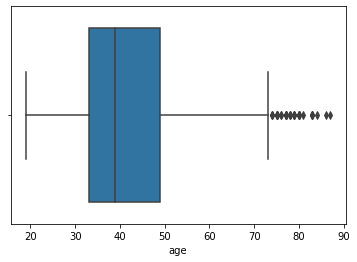

In [8]:
sns.boxplot(x = data.age)

<AxesSubplot:xlabel='duration'>

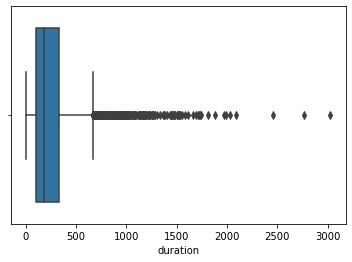

In [9]:
sns.boxplot(x = data.duration)

<AxesSubplot:xlabel='pdays'>

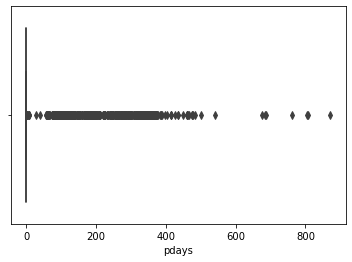

In [10]:
sns.boxplot(x = data.pdays)

<AxesSubplot:xlabel='previous'>

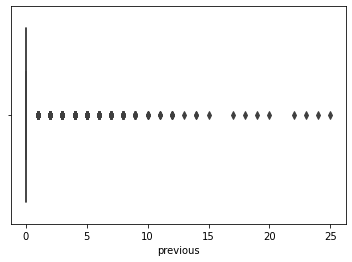

In [11]:
sns.boxplot(x = data.previous)

<AxesSubplot:xlabel='campaign'>

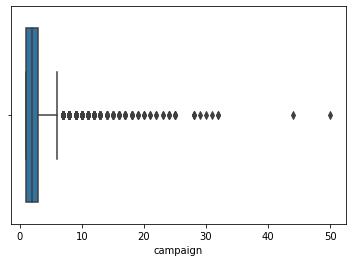

In [12]:
sns.boxplot(x = data.campaign)

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

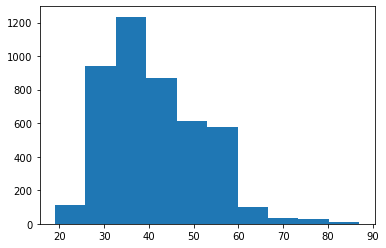

In [13]:
plt.hist(data.age)

(array([3.285e+03, 8.250e+02, 2.670e+02, 9.100e+01, 2.900e+01, 1.600e+01,
        5.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([   4. ,  306.1,  608.2,  910.3, 1212.4, 1514.5, 1816.6, 2118.7,
        2420.8, 2722.9, 3025. ]),
 <BarContainer object of 10 artists>)

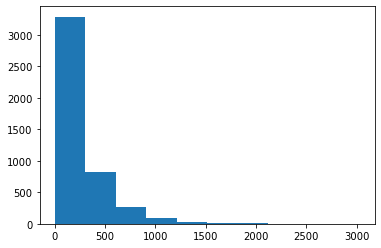

In [14]:
plt.hist(data.duration) #right skewed

(array([3.759e+03, 2.480e+02, 2.000e+02, 1.700e+02, 1.230e+02, 1.300e+01,
        1.000e+00, 3.000e+00, 1.000e+00, 3.000e+00]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <BarContainer object of 10 artists>)

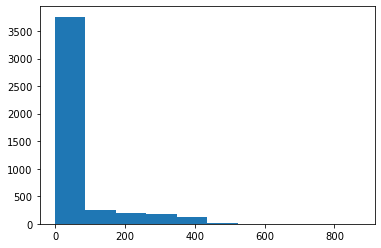

In [15]:
plt.hist(data.pdays) #right skewed

(array([3.285e+03, 8.250e+02, 2.670e+02, 9.100e+01, 2.900e+01, 1.600e+01,
        5.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([   4. ,  306.1,  608.2,  910.3, 1212.4, 1514.5, 1816.6, 2118.7,
        2420.8, 2722.9, 3025. ]),
 <BarContainer object of 10 artists>)

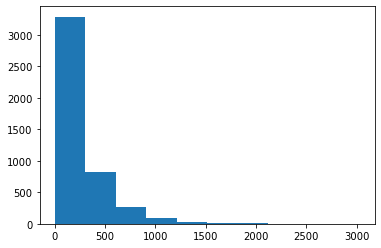

In [16]:
plt.hist(data.duration) #right skewed

(array([4.048e+03, 3.430e+02, 7.900e+01, 2.800e+01, 1.300e+01, 5.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

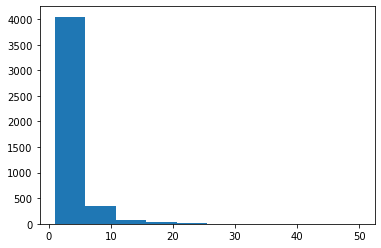

In [17]:
plt.hist(data.campaign) # right skewed  

In [18]:
data.y.value_counts() # imbalanced data clearly

no     4000
yes     521
Name: y, dtype: int64

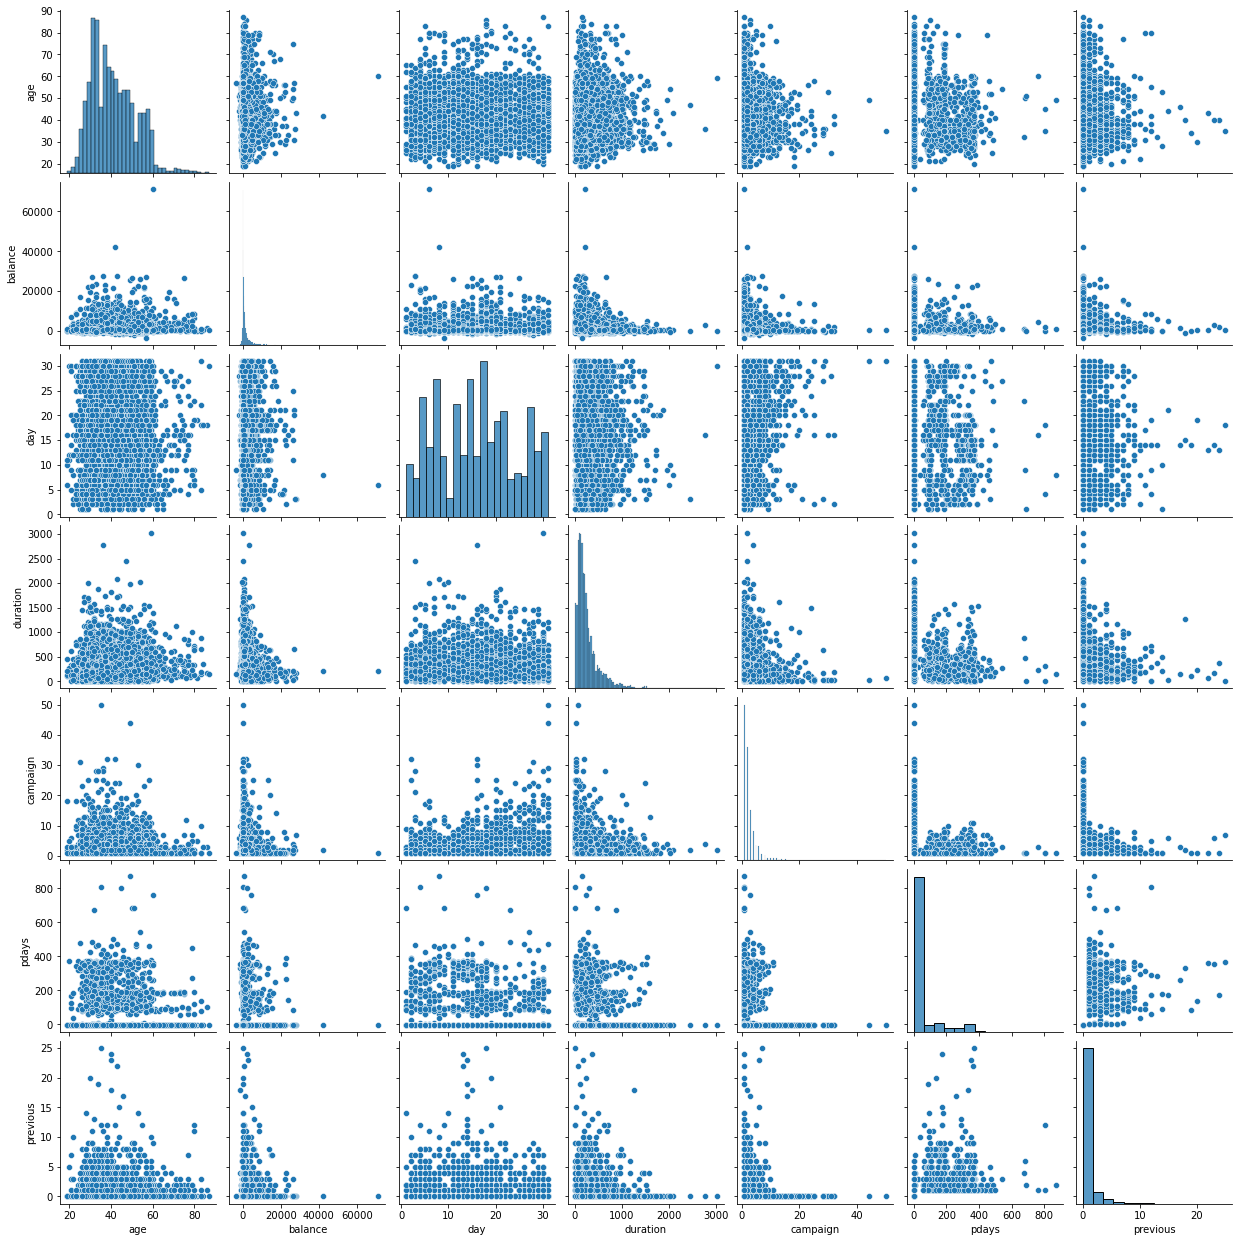

In [19]:
sns.pairplot(data)

In [20]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between duartion and y
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the duartion data for each y(yes/no) as a list
CategoryGroupLists=data.groupby('y')['duration'].apply(list)

#CategoryGroupLists=data.groupby('y')['age'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.1504449021590626e-174


Clearly the pvalue is < 0.05. As a result we reject the null hypothesis and state that duartion and y are correlated.
Also age is correlated with y 

In [21]:
CategoryGroupLists 

y
no     [79, 220, 185, 199, 226, 141, 341, 151, 57, 31...
yes    [261, 897, 958, 354, 97, 132, 765, 181, 1018, ...
Name: duration, dtype: object

In [22]:
x = data.iloc[: , 0:-1]
y = data.iloc[: , -1]

scaler = StandardScaler()

In [114]:
fig = px.box(data, x="job", y="balance" , width = 1000 , height = 700 )
fig.show()


Retired , managament , technicians sector have the people having highest balance. There are outliers in retired and entrepreneur sector for balance


In [24]:
fig = px.histogram(data, x = "job" , width = 500 , height = 400 , color = "job")

fig.show()


There are lot of people belonging to the management sector, also very few belonging to the retired sector. Yet, the retired sector has good balance  

In [115]:
fig = px.histogram(data, x = "loan" , width = 500 , height = 300)
fig1 = px.histogram(data, x = "housing" , width = 500 , height = 300)
fig.show()
fig1.show()

people are taking more housing loan than personal loan

In [26]:
col = data.columns ; col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int32

In [27]:
fig = px.violin(data, x = "education" ,  y="balance" ,width = 500 , height = 300)

fig.show()


education of tertiary sector has highest balance

In [28]:
fig = px.scatter(data, x="duration", y="balance" , color = "loan" , width = 700 , height = 500 )
fig.show()

People who have not took up a loan and have low balance have higher duration, maybe because they want to take a loan

In [29]:
fig = px.scatter(data, x="duration", y="balance" , color = "y" , width = 700 , height = 500 )
fig.show()

Lot of people with low bank balance are very much interested in term deposit and is evident from the the duration feature 

Basically , there are lot of people who have loan and also low bank balance have term deposited

In [30]:
fig = px.scatter(data, y="campaign", x="duration" , color = "y" , width = 700 , height = 500 )
fig.show()

People with less number of calls and less bank balance are also interested in term deposit.
Maybe calling a person again and again didn't really help. But rather engaing a person with least number of calls helped the company bag an investor. 

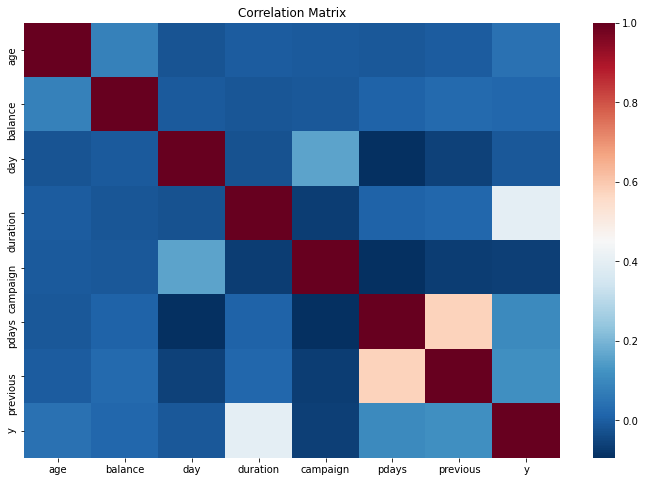

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
data['y'] = LabelEncoder().fit_transform(data['y'])

# Separate both dataframes into 
numeric_df = data.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=12)
plt.show()

In [32]:
fig = px.scatter(data, y="pdays", x="previous" , color = "y" , width = 700 , height = 500 )
fig.show()

In [33]:
data["y"].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [34]:
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [35]:
x = data.iloc[: , :-1]

In [38]:
num_ct = ColumnTransformer( [("scaler" , StandardScaler() , 
                                         ["age", "balance", "day", "campaign", "pdays", "previous","duration"])] )
cat_ct = ColumnTransformer( [("enco" , OneHotEncoder() , 
                                         ["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])] )
pipe1 = Pipeline([
    ("num_pipe" , num_ct)
])

pipe2 = Pipeline([
    ("cat_pipe" , cat_ct)
])

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", pipe1),
        ("categorical_pipeline", pipe2),
    ])

In [39]:
x_= preprocess_pipeline.fit_transform(x)
x_.shape

(4521, 51)

In [40]:
x_ = x_.toarray()

In [41]:
x_[: , 15]

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
oversample = SMOTE()
a, b= oversample.fit_resample(x_, data["y"])

In [78]:
b

0       0
1       0
2       0
3       0
4       0
       ..
7995    1
7996    1
7997    1
7998    1
7999    1
Name: y, Length: 8000, dtype: int32

In [79]:
counter = Counter(b)
counter

Counter({0: 4000, 1: 4000})

In [80]:
x_

array([[-1.05626965,  0.12107186,  0.37405206, ...,  0.        ,
         0.        ,  1.        ],
       [-0.77258281,  1.1186443 , -0.59602646, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58345826, -0.02414438,  0.01027262, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.49691189, -0.37472364,  0.37405206, ...,  0.        ,
         0.        ,  1.        ],
       [-1.24539421, -0.09492484, -1.20232553, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.26760226, -0.09525714, -1.56610497, ...,  1.        ,
         0.        ,  0.        ]])

In [81]:
x_train  , x_test , y_train , y_test = train_test_split(a ,b , test_size = 0.2 , random_state = 0)

In [82]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

C:\Users\sejal Jadev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [83]:
lr.score(x_test , y_test)

0.8375

In [84]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train , y_train)
svc.score(x_test , y_test)

0.9175

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)
knn.score(x_test , y_test)

0.90625

In [116]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train , y_train)
mlp.score(x_test , y_test)

C:\Users\sejal Jadev\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.954375

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train , y_train)
gbc.score(x_test , y_test)

0.9325

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)
rfc.score(x_test , y_test)

0.955625

In [89]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)
gnb.score(x_test , y_test)

0.739375

In [90]:
from sklearn.model_selection import cross_val_score

 # Extra Trees Classifier 
extra_clf = ExtraTreesClassifier()
extra_scores = cross_val_score(extra_clf, x_train, y_train, cv=5)
extra_mean = extra_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier()
rand_scores = cross_val_score(rand_clf, x_train, y_train, cv=5)
rand_mean = rand_scores.mean()

# LGBM Classifier
lgbm_clf = LGBMClassifier()
lgbm_scores = cross_val_score(lgbm_clf, x_train, y_train, cv=5)
lgbm_mean = lgbm_scores.mean()

d = {'Classifiers': ["ExtraTreesclf" , "GradientBosstingclf" , "RandomForest" ,"LGBMclf" ], 
    'Crossval Mean Scores': [extra_mean , grad_mean , rand_mean , lgbm_mean]}

result_df = pd.DataFrame(data=d)

In [91]:
result_df

,Classifiers,Crossval Mean Scores
0,ExtraTreesclf,0.965313
1,GradientBosstingclf,0.930937
2,RandomForest,0.952344
3,LGBMclf,0.943125


In [92]:
y_train_pred = cross_val_predict(extra_clf, x_train, y_train, cv=5)

In [93]:
print ("ExtraTreesCLF accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

ExtraTreesCLF accuracy is 0.97


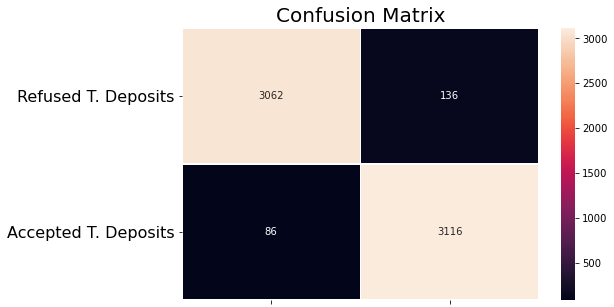

In [94]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [95]:
from sklearn.metrics import f1_score , precision_score , recall_score

print('Precision Score: ', precision_score(y_train, y_train_pred))
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.958179581795818
Recall Score:  0.9731417863835103


In [103]:
from sklearn.metrics import f1_score , roc_auc_score
f1_score(y_train, y_train_pred)

0.9656027269910132

In [99]:
extra_clf.fit(x_train , y_train)

ExtraTreesClassifier()

In [101]:
y_pred = extra_clf.predict_proba(x_test)[:, 1]
y_pred.shape

(1600,)

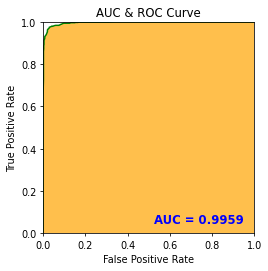

In [108]:
auc = roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 4), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='orange', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()     

In [109]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')